In [13]:
import os
import numpy as np
import warnings
warnings.filterwarnings(action='ignore') # 경고 메세지 숨김
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import PIL
PIL.Image

<module 'PIL.Image' from 'c:\\users\\asus rog g15dh\\appdata\\local\\programs\\python\\python39\\lib\\site-packages\\PIL\\Image.py'>

In [3]:
import pandas as pd
path='C:/Users/ASUS ROG G15DH/Desktop/user_data/'
label_df = pd.read_csv(path+'train.csv')
label_df.head()

,file_name,label
0,001.png,10-2
1,002.png,10-1
2,003.png,3
3,004.png,8
4,005.png,9


In [44]:
def load_CIFAR10(path):
    
    path = path ## 파일 위치 입력
    images = []
    for filename in glob(path +"*"): ## glob로 파일 위치에 있는 것들 다 가져오기
        #print(filename)
        for img in glob(filename): ## 이미지 1개
            #print(img)
            an_img = PIL.Image.open(img) #read img
            img_array = np.array(an_img) #img to array
            images.append(img_array) #append array to training_images
    images = np.array(images)

    return images

In [45]:
training_images = load_CIFAR10(path='C:/Users/ASUS ROG G15DH/Desktop/user_data/train/')

In [46]:
training_images.shape ## 858개의 이미지 / 크기는 224*224 / 채널=3 (색깔 있음)

(858, 224, 224, 3)

In [47]:
print("train 이미지 크기:", training_images.shape)
print("train 라벨 크기:", label_df.shape)

train 이미지 크기: (858, 224, 224, 3)
train 라벨 크기: (858, 2)


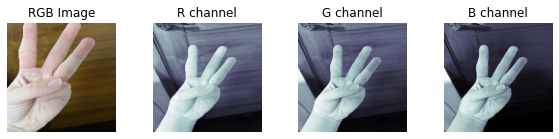

In [49]:
img_rgb = training_images[2]

plt.figure(figsize=(10, 2))

plt.subplot(141)
plt.imshow(img_rgb[50:200, 50:200, :]) ## 이미지 사이즈, 이미지 사이즈, 채널
plt.axis("off")
plt.title("RGB Image")

plt.subplot(142)
plt.imshow(img_rgb[:, :, 0], cmap=plt.cm.bone)
plt.axis("off")
plt.title("R channel")

plt.subplot(143)
plt.imshow(img_rgb[:, :, 1], cmap=plt.cm.bone)
plt.axis("off")
plt.title("G channel")

plt.subplot(144)
plt.imshow(img_rgb[:, :, 2], cmap=plt.cm.bone)
plt.axis("off")
plt.title("B channel")

plt.show()

# 라벨 이미지 출력

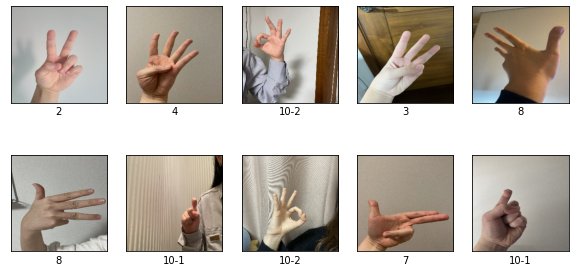

In [65]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=[10,5])
for i in range(10):
    import random
    num = random.randint(0,858)
    plt.subplot(2, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(label_df.label[num])
    plt.imshow(training_images[num])
plt.show()

# 라벨 분포 확인

In [66]:
print(np.unique(label_df.label))

['1' '10-1' '10-2' '2' '3' '4' '5' '6' '7' '8' '9']


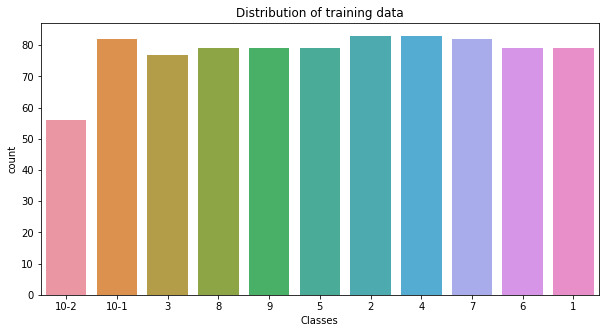

In [67]:
plt.figure(figsize=[10,5])
sns.countplot(label_df.label.ravel())
plt.title('Distribution of training data')
plt.xlabel('Classes')
plt.show()

In [68]:
## 예측해야하는 라벨링 정수로 변경
label_df['label'][label_df['label'] == '10-1'] = 10 ## label : 10-1 -> 10
label_df['label'][label_df['label'] == '10-2'] = 0 ## Label : 10-2 -> 0
label_df['label'] = label_df['label'].apply(lambda x : int(x)) ## Dtype : object -> int

In [69]:
label_df

,file_name,label
0,001.png,0
1,002.png,10
2,003.png,3
3,004.png,8
4,005.png,9
...,...,...
853,854.png,9
854,855.png,1
855,856.png,4
856,857.png,10


In [70]:
print(np.unique(label_df.label))

[ 0  1  2  3  4  5  6  7  8  9 10]
